<a href="https://colab.research.google.com/github/Andru-1987/77695_data_science_i_flex/blob/main/06_clase/clase_06_codigo_vivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
nombre_acciones = {
    "D": "Dominion Energy Inc.",
    "EXC": "Exelon Corp.",
    "NEE": "NextEra Energy Inc.",
    "SO": "Southern Co.",
    "DUK": "Duke Energy Corp."
}

In [3]:
pattern_url:str = r"https://raw.githubusercontent.com/Andru-1987/77695_data_science_i_flex/refs/heads/main/06_clase/storage/acciones/{archivo}.csv"

In [4]:
lista_dataframes = []

In [11]:
for  nombre_archivo, nombre_empresa in  nombre_acciones.items():
    url_path = pattern_url.format(archivo=nombre_archivo)
    print(url_path)
    df = pd.read_csv( url_path, sep=',' )
    df["name"] = nombre_acciones[nombre_archivo]
    lista_dataframes.append(df)

https://raw.githubusercontent.com/Andru-1987/77695_data_science_i_flex/refs/heads/main/06_clase/storage/acciones/D.csv
https://raw.githubusercontent.com/Andru-1987/77695_data_science_i_flex/refs/heads/main/06_clase/storage/acciones/EXC.csv
https://raw.githubusercontent.com/Andru-1987/77695_data_science_i_flex/refs/heads/main/06_clase/storage/acciones/NEE.csv
https://raw.githubusercontent.com/Andru-1987/77695_data_science_i_flex/refs/heads/main/06_clase/storage/acciones/SO.csv
https://raw.githubusercontent.com/Andru-1987/77695_data_science_i_flex/refs/heads/main/06_clase/storage/acciones/DUK.csv


In [13]:
df_final = pd.concat(lista_dataframes).reset_index()
df_final

,index,Date,Open,High,Low,Close,Adj Close,Volume,name
0,0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,Dominion Energy Inc.
1,1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,Dominion Energy Inc.
2,2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,Dominion Energy Inc.
3,3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,Dominion Energy Inc.
4,4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,Dominion Energy Inc.
...,...,...,...,...,...,...,...,...,...
6290,1254,2019-07-22,88.599998,88.690002,87.839996,88.150002,88.150002,2160300,Duke Energy Corp.
6291,1255,2019-07-23,88.180000,88.239998,87.370003,87.680000,87.680000,3141800,Duke Energy Corp.
6292,1256,2019-07-24,87.949997,87.980003,86.800003,87.180000,87.180000,2386500,Duke Energy Corp.
6293,1257,2019-07-25,86.900002,87.389999,86.169998,86.489998,86.489998,2680300,Duke Energy Corp.


## Cálculo de Volatilidad y Retorno + Gráficos

- Calcular la volatilidad relativa ((High - Low) / Open)
- Calcular el retorno ((Close / Open) - 1)
- Graficar ambas métricas para comparar acciones.
- Identificar la mejor inversión (balance entre alto retorno y baja volatilidad).

In [14]:
df_final["volatilidad_relativa"] = (df_final.High - df_final.Low ) / df_final.Open
df_final["retorno"] = (df_final.Close / df_final.Open) - 1

In [15]:
df_final.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,name,volatilidad_relativa,retorno
0,0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,Dominion Energy Inc.,0.018781,0.016201
1,1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,Dominion Energy Inc.,0.014858,-0.010471
2,2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,Dominion Energy Inc.,0.032286,-0.014714
3,3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,Dominion Energy Inc.,0.018505,-0.014425
4,4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,Dominion Energy Inc.,0.017674,0.003861


In [17]:
metricas_por_accion = df_final.groupby("name").agg(
    {
        "volatilidad_relativa": "mean",
        "retorno": "mean"
    }
).reset_index()


metricas_por_accion

,name,volatilidad_relativa,retorno
0,Dominion Energy Inc.,0.014836,0.000339
1,Duke Energy Corp.,0.014534,0.000307
2,Exelon Corp.,0.017722,0.000368
3,NextEra Energy Inc.,0.014881,0.000700
4,Southern Co.,0.014065,0.000595


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

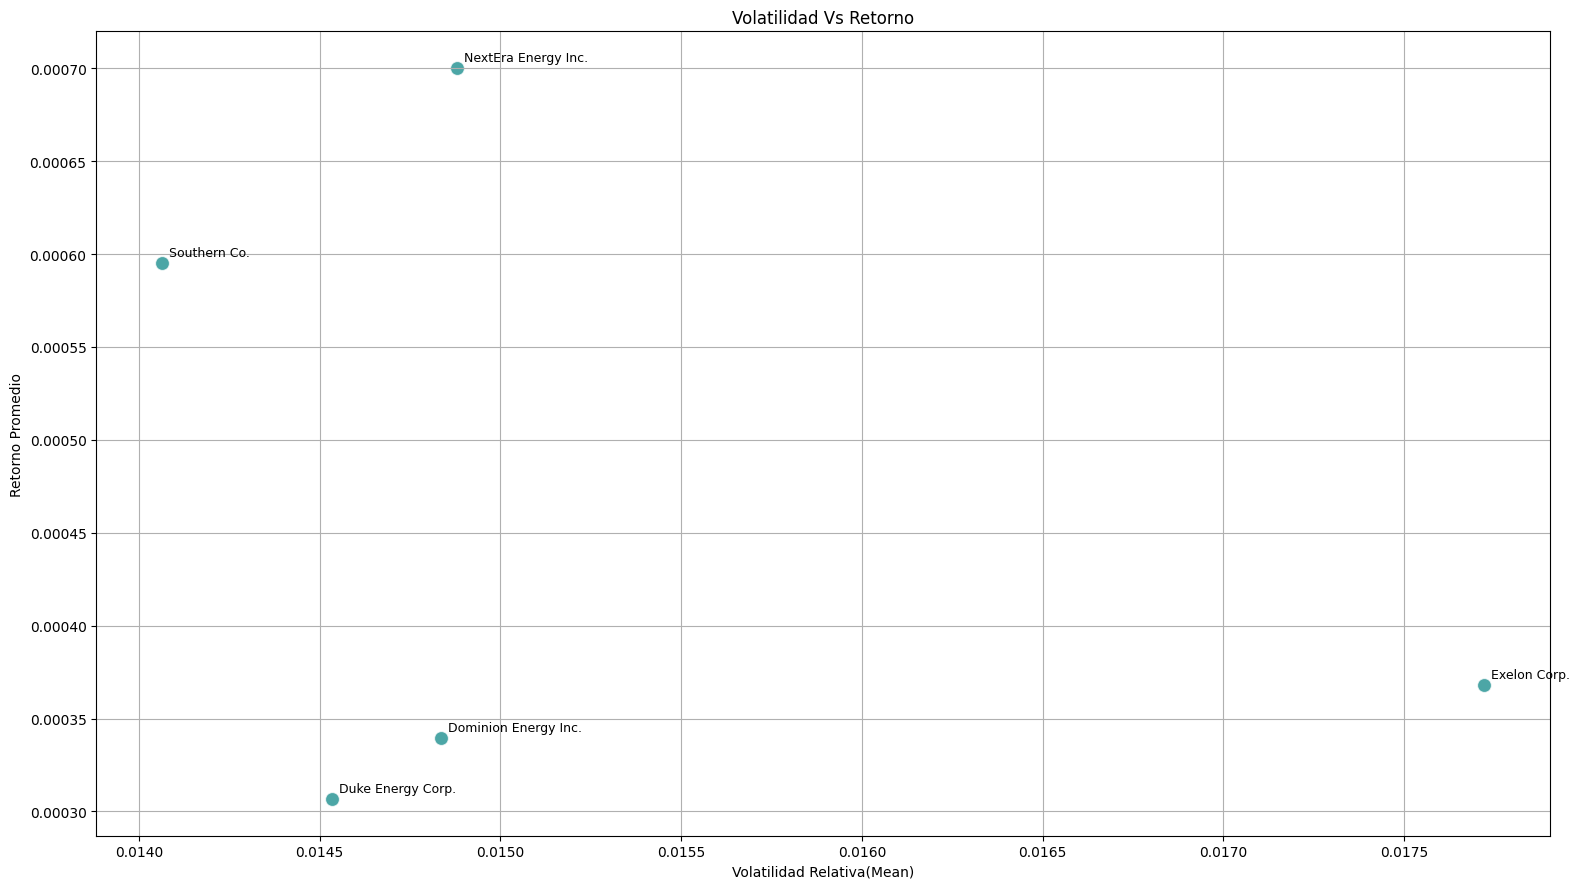

In [22]:
plt.figure( figsize=(16,9))
scatter = sns.scatterplot(
    data = metricas_por_accion,
    x="volatilidad_relativa",
    y="retorno",
    s = 100,
    alpha=0.7,
    color="teal"
)

# lo extra viz


plt.xlabel("Volatilidad Relativa(Mean)")
plt.ylabel("Retorno Promedio")

plt.title("Volatilidad Vs Retorno")


for i,row in metricas_por_accion.iterrows():
    plt.annotate(
        row["name"],
        (row["volatilidad_relativa"],row["retorno"]),
        textcoords="offset points",
        xytext=(5,5),
        ha='left',
        fontsize=9
    )



plt.tight_layout()
plt.grid(True)
plt.show()

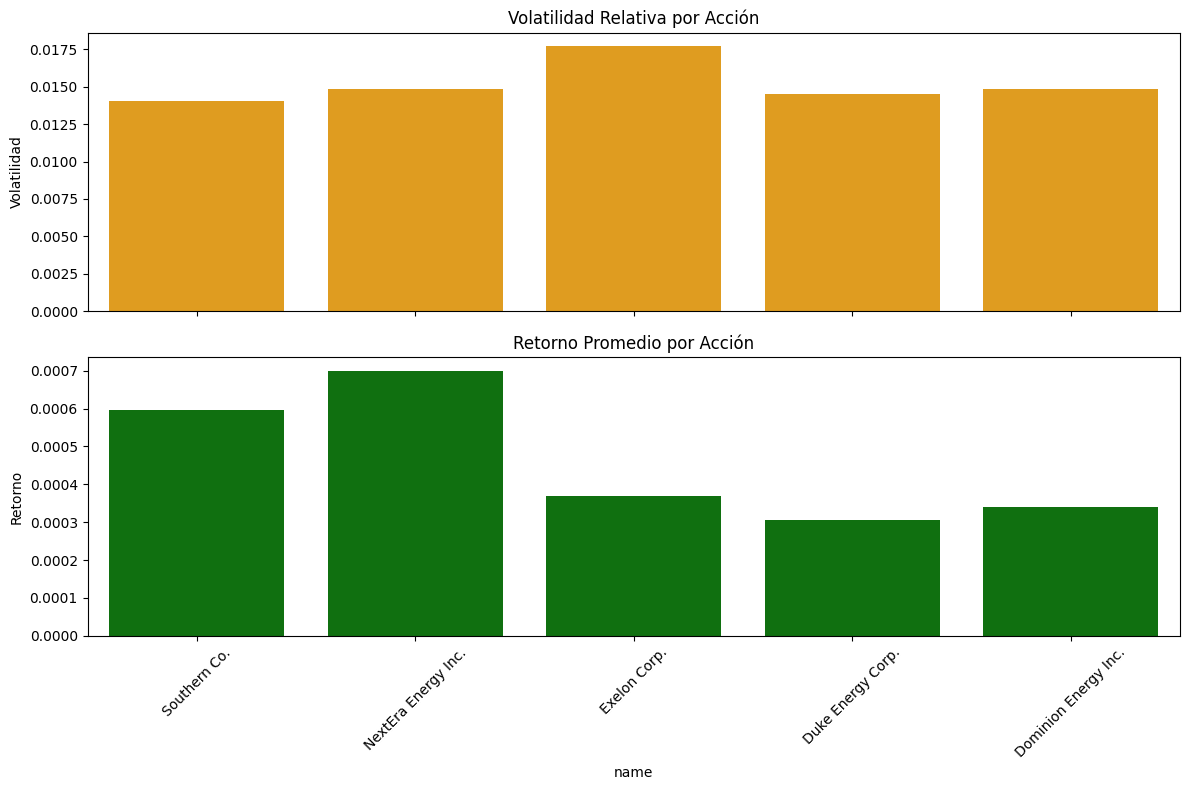

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar los datos por nombre
df_ordenado = metricas_por_accion.sort_values("name", ascending=False)

# Crear figura con 2 subplots (uno encima del otro)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

# Volatilidad relativa
sns.barplot(
    data=df_ordenado,
    x="name", y="volatilidad_relativa",
    color="orange",
    ax=axes[0]
)
axes[0].set_title("Volatilidad Relativa por Acción")
axes[0].set_ylabel("Volatilidad")
axes[0].tick_params(axis='x', rotation=45)

# Retorno promedio
sns.barplot(
    data=df_ordenado,
    x="name", y="retorno",
    color="green",
    ax=axes[1]
)
axes[1].set_title("Retorno Promedio por Acción")
axes[1].set_ylabel("Retorno")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [26]:
metricas_por_accion["ratio_retorno_volatilidad"] = metricas_por_accion["retorno"] / metricas_por_accion["volatilidad_relativa"]
mejor_inversion = metricas_por_accion.sort_values("ratio_retorno_volatilidad", ascending=False).iloc[0]



In [25]:
mejor_inversion

,name,volatilidad_relativa,retorno,ratio_retorno_volatilidad
3,NextEra Energy Inc.,0.014881,0.000700,0.047054
4,Southern Co.,0.014065,0.000595,0.042326
0,Dominion Energy Inc.,0.014836,0.000339,0.022872
1,Duke Energy Corp.,0.014534,0.000307,0.021097
2,Exelon Corp.,0.017722,0.000368,0.020760


In [27]:
print(f"\nMejor inversión: {mejor_inversion['name']}")
print(f"Retorno: {mejor_inversion['retorno']:.2%}")
print(f"Volatilidad: {mejor_inversion['volatilidad_relativa']:.2%}")


Mejor inversión: NextEra Energy Inc.
Retorno: 0.07%
Volatilidad: 1.49%


# Outliers

In [29]:
url_bank = "https://raw.githubusercontent.com/Andru-1987/77695_data_science_i_flex/refs/heads/main/06_clase/storage/bank_storage_data/bank-full.csv"
df_bank = pd.read_csv(url_bank)
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [31]:
print("\nInformación del dataset:")
print(df_bank.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


<Axes: xlabel='age'>

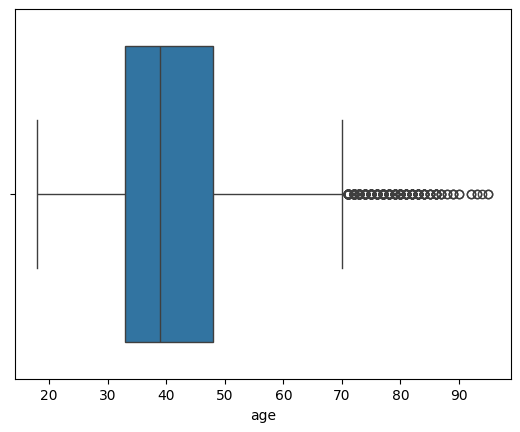

In [53]:
sns.boxplot(x=df_bank.age)

<Axes: xlabel='age', ylabel='Count'>

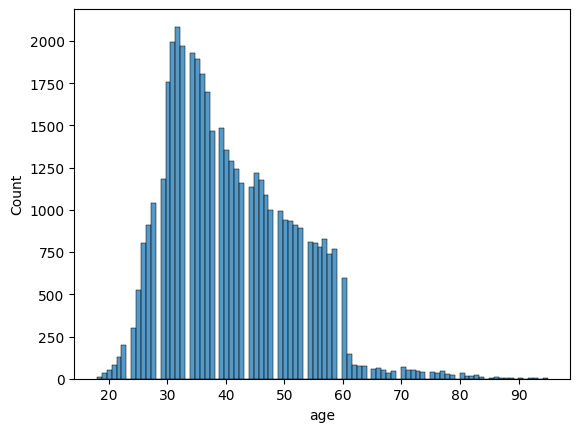

In [54]:
sns.histplot(x=df_bank.age)

In [45]:
def detect_outlier_iqr(data,column,threshold=1.5):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)

    IQR = Q3-Q1

    lower = Q1 -threshold*IQR
    upper = Q3 +threshold*IQR


    outlier = data[ (data[column] < lower) | (data[column] > upper) ]
    return outlier

In [56]:
def remove_outlier(data,column,threshold=1.5):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)

    IQR = Q3-Q1

    lower = Q1 -threshold*IQR
    upper = Q3 +threshold*IQR


    return data[(data[col] >= lower) & (data[col] <= upper)]


In [46]:
columns = ["age","duration"]


Outliers en age (IQR):
487

Outliers en duration (IQR):
3235


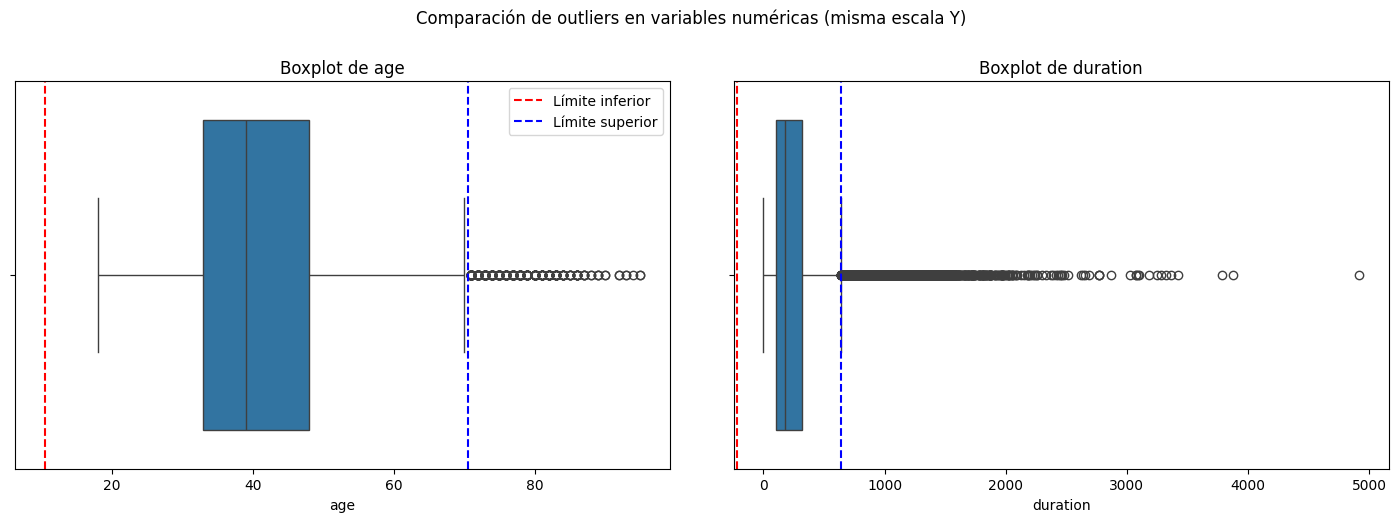

In [48]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=len(columns),
    figsize=(15, 5),
    sharey=True
)
plt.tight_layout(pad=3.0)

iqr_outliers = {}

for i, col in enumerate(columns):
    # Detección de outliers
    iqr_outliers[col] = detect_outlier_iqr(df_bank, col)

    print(f"\nOutliers en {col} (IQR):")
    print(iqr_outliers[col].shape[0])

    # Calcular límites IQR
    Q1 = df_bank[col].quantile(0.25)
    Q3 = df_bank[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Visualización con seaborn
    sns.boxplot(x=df_bank[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel(col)

    # Agregar líneas de límites
    axes[i].axvline(lower_limit, color='red', linestyle='--', label='Límite inferior')
    axes[i].axvline(upper_limit, color='blue', linestyle='--', label='Límite superior')

    # Solo mostrar la leyenda en el primer subplot
    if i == 0:
        axes[i].legend()

plt.suptitle('Comparación de outliers en variables numéricas (misma escala Y)', y=1.05)
plt.show()


In [59]:
df_outlier_removed = remove_outlier(df_bank,"age",threshold=1.5)

In [60]:
df_outlier_removed

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no
17,57,blue-collar,married,primary,no,52,yes,no,unknown,5,may,38,1,-1,0,unknown,no
19,33,services,married,secondary,no,0,yes,no,unknown,5,may,54,1,-1,0,unknown,no
42,60,blue-collar,married,unknown,no,104,yes,no,unknown,5,may,22,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44963,37,blue-collar,married,secondary,no,1403,no,no,unknown,9,oct,14,1,-1,0,unknown,no
44989,59,retired,divorced,primary,no,606,no,no,unknown,12,oct,54,1,526,2,failure,no
45082,66,retired,married,primary,no,8,no,no,cellular,22,oct,56,2,-1,0,unknown,no
45122,40,entrepreneur,single,tertiary,no,262,yes,yes,unknown,26,oct,17,1,-1,0,unknown,no


<Axes: xlabel='age', ylabel='Count'>

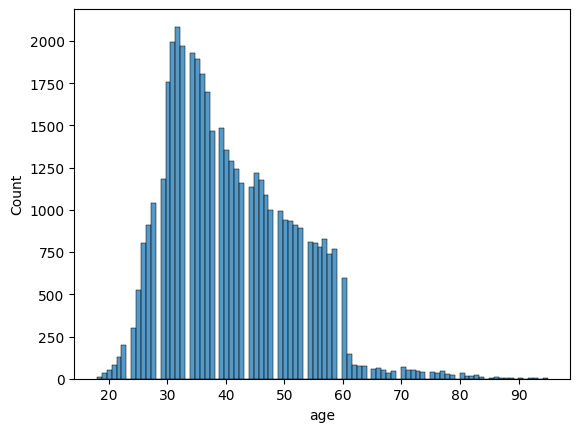

In [61]:
sns.histplot(df_bank.age)

<Axes: xlabel='age', ylabel='Count'>

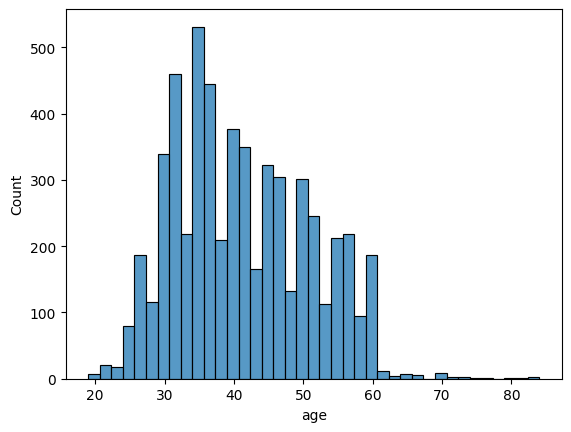

In [62]:
sns.histplot(df_outlier_removed.age)